# Convolutional Neural Network 


In [81]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt 
import numpy as np 

In [124]:
# https://www.cs.toronto.edu/~kriz/cifar.html
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [83]:
# check a sample array
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

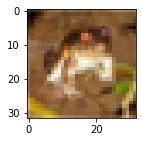

In [88]:
### check a sample image ###
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])
plt.show()

In [125]:
### reshape the y_train data ### 
print('--- y_train ---')
print(y_train[:5])
print('--- y_train reshaped ---')
y_train = y_train.reshape(-1,)
y_train[:5]

--- y_train ---
[[6]
 [9]
 [9]
 [4]
 [1]]
--- y_train reshaped ---


array([6, 9, 9, 4, 1], dtype=uint8)

In [126]:
### set the classes for the categories ###
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('class test #9:', classes[9])

class test #9: truck


In [127]:
### a function to show the sample image ###
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

--- sample image ---


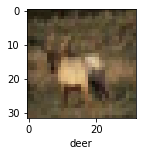

In [96]:
print('--- sample image ---')
plot_sample(X_train, y_train, 3)

In [129]:
### normalize all the data ### 
print('X_train shape:', X_train[0])
X_train = X_train/255
print('X_train normalized shape:', X_train[0])
print('X_test shape:', X_test[0])
X_test = X_test/255
print('X_test normalized shape:', X_test[0])

X_train shape: [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
X_train normalized shape: [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 

### Basic Artifical Neural Network

In [130]:
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models 
### artificial neural network ### 
ann_model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(32,32,3)), # input layer, flatten, set shape 
                           keras.layers.Dense(3000, activation='relu'), # deep layers, neurons, aqctivation 
                           keras.layers.Dense(1000, activation='relu'), # deep layers, neurons, aqctivation 
                           keras.layers.Dense(10, activation='sigmoid') # output layer, 10 neurons for 10 categories in the data, activation 
                          ])
ann_model.compile(
              optimizer='SGD', # Stochastic Gradient Descent
              loss='sparse_categorical_crossentropy', # directly using the value, was not encoded
              metrics=['accuracy'] # measure with accuracy 
              )
### show summary ### 
ann_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 3000)              9219000   
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              3001000   
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [131]:
from sklearn import metrics
### fit the model, get metrics ###  
print('--- model runtime ---')
%time history = ann_model.fit(X_train, y_train, epochs=5) # fit the model on the data 
### make the prediction on the data ###
y_pred = ann_model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred] # find the largest value in each element in the prediction
print('--- model metrics ---')
scores = ann_model.evaluate(X_test, y_test) # get the model score from evaluation
print(f'model evaluation score: {scores[1]*100}') # show the models accuracy score 
print('model accuracy score:', metrics.accuracy_score(y_test, y_classes)) # model accuracy
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_classes)) # classificatin report

--- model runtime ---
Epoch 1/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.9301 - accuracy: 0.3048
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6472 - accuracy: 0.4204
Epoch 3/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.5485 - accuracy: 0.4518
Epoch 4/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.4901 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4450 - accuracy: 0.4934
CPU times: user 12min 56s, sys: 17 s, total: 13min 13s
Wall time: 7min 35s
--- model metrics ---
313/313 [==============================] - 6s 19ms/step - loss: 1.4834 - accuracy: 0.4710
model evaluation score: 47.09999859333038
model accuracy score: 0.471
--- classification report ---
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.52      0.74      0.61      1000
           2 

--- model loss-MAE --- 


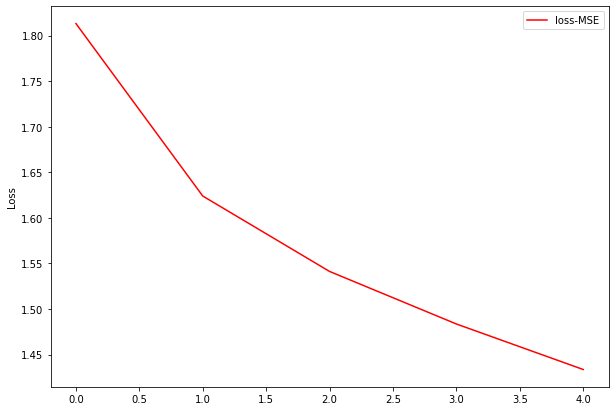

In [132]:
import matplotlib.pyplot as plt
### plot the model loss ###
### configure the plot ###
print('--- model loss-MAE --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = plt.plot(history.history['loss'], color="r", label="loss-MSE")
plt.ylabel('Loss')
plt.legend()
plt.show()

### Convolutional Neural Network

In [133]:
from tensorflow import keras 
### convolutional neural network ### 
cnn_model = keras.Sequential([
                          keras.layers.Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)), # conv layer 
                          keras.layers.MaxPooling2D((2,2)), # pool layer 
                          keras.layers.Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu'), 
                          keras.layers.MaxPooling2D((2,2)), 

                           # dense  
                           keras.layers.Flatten(), # input 'dense' layer, flatten
                           keras.layers.Dense(64, activation='relu'), # deep layers, neurons, aqctivation
                           keras.layers.Dense(10, activation='softmax') # output layer, 10 neurons for 10 categories in the data, activation, softmax normalize probability to 1
                              ])
cnn_model.compile(
              optimizer='adam', # popular, gives good accuracy
              loss='sparse_categorical_crossentropy', # directly using the value, was not encoded
              metrics=['accuracy'] # measure with accuracy 
              )
### show summary ### 
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [134]:
from sklearn import metrics 
### fit the model, get metrics ###  
print('--- model runtime ---')
%time history = cnn_model.fit(X_train, y_train, epochs=5) # fit the model on the data 
### make the prediction on the data ###
y_pred = cnn_model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred] # find the largest value in each element in the prediction
print('--- model metrics ---')
scores = cnn_model.evaluate(X_test, y_test) # get the model score from evaluation
print(f'model evaluation score: {scores[1]*100}') # show the models accuracy score 
print('model accuracy score:', metrics.accuracy_score(y_test, y_classes)) # model accuracy
print('--- classification report ---') 
print(metrics.classification_report(y_test,y_classes)) # classificatin report

--- model runtime ---
Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.7223 - accuracy: 0.3716
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1757 - accuracy: 0.5830
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0245 - accuracy: 0.6393
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9459 - accuracy: 0.6671
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8816 - accuracy: 0.6902
CPU times: user 7min 22s, sys: 20.3 s, total: 7min 42s
Wall time: 4min 23s
--- model metrics ---
313/313 [==============================] - 3s 10ms/step - loss: 0.9833 - accuracy: 0.6550
model evaluation score: 65.49999713897705
model accuracy score: 0.655
--- classification report ---
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1000
           1       0.87      0.69      0.77      1000
           2 

--- model loss-MAE --- 


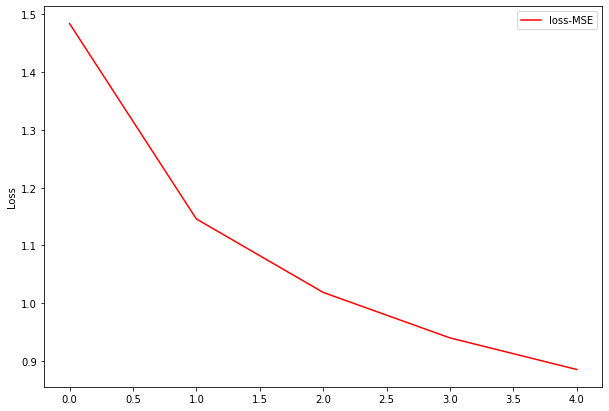

In [135]:
import matplotlib.pyplot as plt
### plot the model loss ###
### configure the plot ###
print('--- model loss-MAE --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = plt.plot(history.history['loss'], color="r", label="loss-MSE")
plt.ylabel('Loss')
plt.legend()
plt.show()

### Show the predictions 

In [136]:
### reshape the y_test data ### 
print('--- y_test ---')
print(y_test[:5])
print('--- y_test reshaped ---')
y_test = y_test.reshape(-1,)
y_test[:5]

--- y_test ---
[[3]
 [8]
 [8]
 [0]
 [6]]
--- y_test reshaped ---


array([3, 8, 8, 0, 6], dtype=uint8)

In [122]:
y_pred = cnn_model.predict(X_test)

prediction: frog
--- show sample image ---


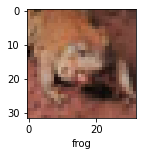

In [138]:
### make the prediction on the data ###
y_pred = cnn_model.predict(X_test)
### find the largest value in each element in the prediction ### 
y_classes = [np.argmax(element) for element in y_pred]
### show a sample vs the prediction ### 
print('prediction:', classes[y_classes[5]])
print('--- show sample image ---')
plot_sample(X_test, y_test, 5)